# Lay Summarization: Bridging Biomedical Research and Everyday Understanding

Authors: Chloe Nguyen & Phoebe Yueh

DATASCI266 Final Project - Summer 2024 Semester

## Set Up

### Pip install and imports

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 require

In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f82b0a8901219263b6b6edd56cb6e9f5792e1d924b4376dbc369ba64ef239877
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import evaluate
import pandas as pd
import nltk
import textstat
from torch.utils.data import DataLoader
from rouge_score import rouge_scorer
from datasets import load_dataset, Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, BertForSequenceClassification, BertModel, BertTokenizer, DataCollatorForSeq2Seq, PegasusForConditionalGeneration, pipeline, Seq2SeqTrainer, Seq2SeqTrainingArguments, Trainer, TrainerCallback, TrainingArguments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from google.colab import drive
import os
# from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Helpers

In [ ]:
# Function to evaluate the summaries using ROUGE
def evaluate_summaries(reference_summaries, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = [scorer.score(ref, gen) for ref, gen in zip(reference_summaries, generated_summaries)]

    avg_scores = {
        'rouge1': {
            'precision': np.mean([score['rouge1'].precision for score in scores]),
            'recall': np.mean([score['rouge1'].recall for score in scores]),
            'f1': np.mean([score['rouge1'].fmeasure for score in scores])
        },
        'rouge2': {
            'precision': np.mean([score['rouge2'].precision for score in scores]),
            'recall': np.mean([score['rouge2'].recall for score in scores]),
            'f1': np.mean([score['rouge2'].fmeasure for score in scores])
        },
        'rougeL': {
            'precision': np.mean([score['rougeL'].precision for score in scores]),
            'recall': np.mean([score['rougeL'].recall for score in scores]),
            'f1': np.mean([score['rougeL'].fmeasure for score in scores])
        }
    }

    # readability metrics
    fk_grade_levels = [textstat.flesch_kincaid_grade(summary) for summary in generated_summaries]
    gunning_fog_indices = [textstat.gunning_fog(summary) for summary in generated_summaries]

    readability_metrics = {
        'flesch_kincaid_grade': np.mean(fk_grade_levels),
        'gunning_fog_index': np.mean(gunning_fog_indices)
    }

    return avg_scores, readability_metrics

## Data and EDA

In [ ]:
dataset = load_dataset("tomasg25/scientific_lay_summarisation", "plos")

The repository for tomasg25/scientific_lay_summarisation contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tomasg25/scientific_lay_summarisation.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/24773 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1376 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1376 [00:00<?, ? examples/s]

In [ ]:
# Get one row of the dataset
example = dataset['train'][2]

# Print all keys in the example
print(example.keys())

dict_keys(['article', 'summary', 'section_headings', 'keywords', 'year', 'title'])


In [ ]:
print(example['article'])

Sustainable dengue intervention requires the participation of communities . Therefore , understanding the health beliefs , knowledge and perceptions of dengue among the local people can help to design locally appropriate strategies for effective interventions . A combination of qualitative semi-structured in-depth interviews ( SDIs ) and quantitative household questionnaire surveys ( HHSs ) was used to investigate the beliefs , knowledge and perceptions of dengue among the Shan people in Eastern Shan Special Region IV ( ESSR4 ) , Myanmar . The SDI was administered to 18 key informants , and the HHS was administered to 259 respondents . Only 14 . 7% ( 95% CI: 10 . 6–19 . 6% ) of the HHS respondents could confirm that mosquitoes transmit dengue; 14 . 3% ( 95% CI: 10 . 3–19 . 1% ) knew that piebald or Aedes mosquitoes transmit dengue; and 24 . 3% ( 95% CI: 19 . 2–30 . 0% ) believed that dengue-transmitting mosquitoes mainly lived in small ponds . Merely ten ( 0 . 4% ) of the 259 responden

In [ ]:
print(example['summary'])

The burden of dengue has been increasing over the last five decades , and dengue fever ( DF ) has become one of the most rapidly spreading mosquito-borne diseases . DF has become another disease that threatens public health after malaria has become successfully controlled along the China-Myanmar border . However , it is currently not easy to contain epidemics of the dengue virus . As part of an integrated vector management approach , a community-based method is effective in the prevention of DF by tailoring the approach in a local context . Consequently , mixed methods comprising qualitative semi-structured in-depth interviews ( SDIs ) and quantitative household questionnaire surveys ( HHSs ) were used to study the health beliefs , knowledge and perceptions about dengue among the Shan people in Eastern Shan Special Region IV , Myanmar . This study found that the Shan people believed that their health was closely associated with their lifestyle and the social and physical environment in

In [ ]:
print(example['keywords'])

invertebrates
medicine and health sciences
behavioral and social aspects of health
tropical diseases
social sciences
ponds
neuroscience
animals
health care
developmental biology
cognitive psychology
bodies of water
neglected tropical diseases
insect vectors
language
public and occupational health
infectious diseases
dengue fever
marine and aquatic sciences
life cycles
hygiene
disease vectors
insects
arthropoda
socioeconomic aspects of health
mosquitoes
psychology
eukaryota
earth sciences
biology and life sciences
species interactions
viral diseases
cognitive science
larvae
organisms


In [ ]:
# Get the number of examples in the train and test splits
num_train = len(dataset['train'])
num_test = len(dataset['test'])
num_val = len(dataset['validation'])

print(f"Number of training examples: {num_train}")
print(f"Number of test examples: {num_test}")
print(f"Number of validation examples: {num_val}")

Number of training examples: 24773
Number of test examples: 1376
Number of validation examples: 1376


In [ ]:
test_data = dataset["test"]
train_data = dataset["train"]
validation_data = dataset["validation"]

In [ ]:
test_data_df = pd.DataFrame({
    "article": dataset["test"]["article"],
    "summary": dataset["test"]["summary"]
})

train_data_df = pd.DataFrame({
    "article": dataset["train"]["article"],
    "summary": dataset["train"]["summary"]
})

validation_data_df = pd.DataFrame({
    "article": dataset["validation"]["article"],
    "summary": dataset["validation"]["summary"]
})


# Calculate average length of article
avg_article_length_test = test_data_df["article"].apply(lambda x: len(x.split())).mean()
avg_article_length_train = train_data_df["article"].apply(lambda x: len(x.split())).mean()
avg_article_length_validation = validation_data_df["article"].apply(lambda x: len(x.split())).mean()

# Print average lengths
print(f"Average length of 'article' in test data: {avg_article_length_test:.2f} words")
print(f"Average length of 'article' in train data: {avg_article_length_train:.2f} words")
print(f"Average length of 'article'in validation data: {avg_article_length_validation:.2f} words")


# Calculate average length of summary
avg_summary_length_test = test_data_df["summary"].apply(lambda x: len(x.split())).mean()
avg_summary_length_train = train_data_df["summary"].apply(lambda x: len(x.split())).mean()
avg_summary_length_validation = validation_data_df["summary"].apply(lambda x: len(x.split())).mean()

# Print average lengths
print(f"Average length of 'summary' in test data: {avg_summary_length_test:.2f} words")
print(f"Average length of 'summary' in train data: {avg_summary_length_train:.2f} words")
print(f"Average length of 'summary' in validation data: {avg_summary_length_validation:.2f} words")

Average length of 'article' in test data: 6708.01 words
Average length of 'article' in train data: 6754.10 words
Average length of 'article'in validation data: 6741.48 words
Average length of 'summary' in test data: 194.70 words
Average length of 'summary' in train data: 194.90 words
Average length of 'summary' in validation data: 194.51 words


In [ ]:
# Readability metrics of lay summaries
reference_fk_grade_levels = [textstat.flesch_kincaid_grade(summary) for summary in test_data['summary']]
reference_gunning_fog_indices = [textstat.gunning_fog(summary) for summary in test_data['summary']]

reference_readability_metrics = {
        'flesch_kincaid_grade': np.mean(reference_fk_grade_levels),
        'gunning_fog_index': np.mean(reference_gunning_fog_indices)
    }

print(f"Readability metrics of lay summaries: {reference_readability_metrics}")

Readability metrics of lay summaries: {'flesch_kincaid_grade': 14.738662790697676, 'gunning_fog_index': 16.205603197674417}


## Baseline

### Abstractive Summarization with Pretrained BART-LARGE-CNN Model on Abstract

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
model = AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

In [ ]:
# Get the abstract for BART model inputs
def abs(df):
    paragraphs = df['article'].split('\n')
    abstract = '\n'.join(paragraphs[:1])
    return {'article': abstract}

In [ ]:
# Apply the function to train and test data
train_data_abs = train_data.map(abs)
test_data_abs = test_data.map(abs)
validation_data_abs = validation_data.map(abs)

Map:   0%|          | 0/24773 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

In [ ]:
def bart_baseline_abs(article):
    inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
# Generate summaries for the test set
generated_summaries = [bart_baseline_abs(article) for article in test_data_abs['article']]

In [ ]:
reference_summaries = test_data_abs['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)

In [ ]:
print(rouge_scores)
print(readability_metrics)

### Abstractive Summarization with Pretrained BART-LARGE-CNN Model on Abstract, Introduction, and Conclusion

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
model = AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

In [ ]:
# Get the abstract + intro + conclusion for BART model inputs
def abs_intro_con(df):
    paragraphs = df['article'].split('\n')
    abstract_intro_con = '\n'.join(paragraphs[0:2] + [paragraphs[-1]])
    return {'article': abstract_intro_con}

In [ ]:
# Apply the function to train and test data
train_data_abs_intro_con = train_data.map(abs_intro_con)
test_data_abs_intro_con = test_data.map(abs_intro_con)
val_data_abs_intro_con = validation_data.map(abs_intro_con)

In [ ]:
def bart_baseline_abs_intro_con(article):
    inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
# Generate summaries for the test set
generated_summaries_abs_intro_con = [bart_baseline_abs_intro_con(article) for article in test_data_abs_intro_con['article']]

In [ ]:
reference_summaries_abs_intro_con = test_data_abs_intro_con['summary']

In [ ]:
rouge_scores_abs_intro_con,readability_metrics_abs_intro_con = evaluate_summaries(reference_summaries_abs_intro_con, generated_summaries_abs_intro_con)

In [ ]:
print(rouge_scores_abs_intro_con)
print(readability_metrics_abs_intro_con)

### Abstractive Summarization with Pretrained BART-LARGE-CNN Model on Full Article

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
model = AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

In [ ]:
def bart_baseline(article):
    inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
generated_summaries = [bart_baseline(article) for article in test_data['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)

{'rouge1': {'precision': 0.6057849649252436, 'recall': 0.25806987779722335, 'f1': 0.3539298402497159}, 'rouge2': {'precision': 0.2178385538992166, 'recall': 0.0913458586886266, 'f1': 0.12590433195106165}, 'rougeL': {'precision': 0.36763900902568075, 'recall': 0.15492977563455998, 'f1': 0.2132327157025594}}


## Experiments - Fine-Tuned BART & Hybrid Summarization

### Fine-Tuning BART Explorations

#### Prep

In [ ]:
# If model has been trained and saved, then load model from drive

drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/trained_bart_model2'
tokenizer_path = '/content/drive/MyDrive/trained_bart_tokenizer2'

bart_model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

Mounted at /content/drive


In [ ]:
class TrainLossesCallback(TrainerCallback):
    def __init__(self):
        self.losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.losses.append(logs['loss'])

train_losses_log = TrainLossesCallback()

In [ ]:
def preprocess_data(examples):
    inputs = examples['article']
    targets = examples['summary']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')
    labels = tokenizer(targets, max_length=200, truncation=True, padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

def abs_intro_con(df):
    paragraphs = df['article'].split('\n')
    abstract_intro_con = '\n'.join(paragraphs[0:2] + [paragraphs[-1]])
    return {'article': abstract_intro_con}

def abs(df):
    paragraphs = df['article'].split('\n')
    abstract = '\n'.join(paragraphs[:1])
    return {'article': abstract}

In [ ]:
columns_to_remove = ['section_headings', 'keywords', 'year', 'title']

train_data_abs_intro_con = train_data.map(abs_intro_con)
test_data_abs_intro_con = test_data.map(abs_intro_con)
val_data_abs_intro_con = validation_data.map(abs_intro_con)

test_data_abs = test_data.map(abs)

tokenized_train_data = train_data.map(preprocess_data, batched=True, remove_columns=columns_to_remove)
tokenized_test_data = test_data.map(preprocess_data, batched=True, remove_columns=columns_to_remove)
tokenized_val_data = validation_data.map(preprocess_data, batched=True, remove_columns=columns_to_remove)

tokenized_train_data_abs_intro_con = train_data_abs_intro_con.map(preprocess_data, batched=True, remove_columns=columns_to_remove)
tokenized_test_data_abs_intro_con = test_data_abs_intro_con.map(preprocess_data, batched=True, remove_columns=columns_to_remove)
tokenized_val_data_abs_intro_con = val_data_abs_intro_con.map(preprocess_data, batched=True, remove_columns=columns_to_remove)

Map:   0%|          | 0/24773 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

Map:   0%|          | 0/24773 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

#### Fine-Tuning BART on Abstract, Introduction, and Conclusion

In [ ]:
tokenizer= AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model= AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=bart_model)

training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model2",
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    num_train_epochs=4,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True)

In [ ]:
trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=tokenized_train_data_abs_intro_con,
    eval_dataset=tokenized_val_data_abs_intro_con,
    tokenizer=tokenizer,
    data_collator=data_collator,
    callbacks=[train_losses_log]
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,1.926900,2.004851
2,1.900100,1.972085
3,1.790000,1.956313
4,1.742100,1.960566


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

TrainOutput(global_step=6196, training_loss=1.8687230800335604, metrics={'train_runtime': 7410.7882, 'train_samples_per_second': 13.371, 'train_steps_per_second': 0.836, 'total_flos': 2.147427292324823e+17, 'train_loss': 1.8687230800335604, 'epoch': 4.0})

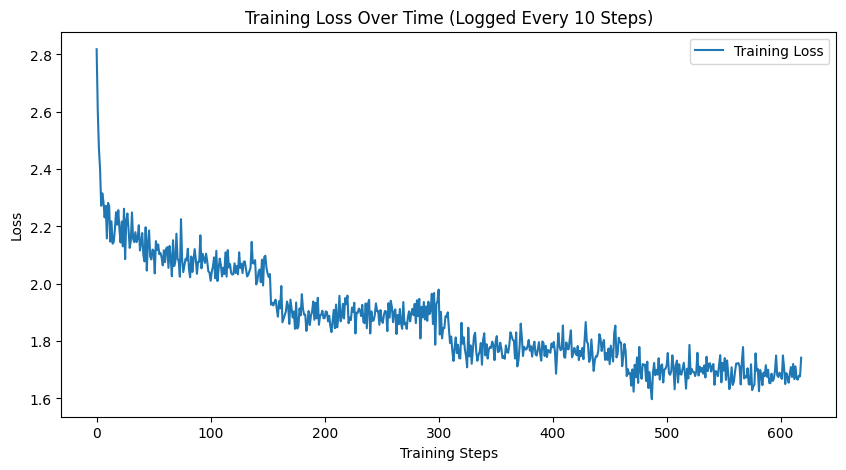

In [ ]:
# Plot training losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses_log.losses, label='Training Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss Over Time (Logged Every 10 Steps)')
plt.legend()
plt.show()

In [ ]:
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/trained_bart_model2'
tokenizer_path = '/content/drive/MyDrive/trained_bart_tokenizer2'

os.makedirs(model_path, exist_ok=True)
os.makedirs(tokenizer_path, exist_ok=True)

bart_model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


Mounted at /content/drive


('/content/drive/MyDrive/trained_bart_tokenizer2/tokenizer_config.json',
 '/content/drive/MyDrive/trained_bart_tokenizer2/special_tokens_map.json',
 '/content/drive/MyDrive/trained_bart_tokenizer2/vocab.json',
 '/content/drive/MyDrive/trained_bart_tokenizer2/merges.txt',
 '/content/drive/MyDrive/trained_bart_tokenizer2/added_tokens.json',
 '/content/drive/MyDrive/trained_bart_tokenizer2/tokenizer.json')

#### Fine-Tuning BART on Full Article

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=bart_model)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model4",
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=4,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True)

In [ ]:
trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=tokenized_train_data,
    eval_dataset=tokenized_val_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    callbacks=[train_losses_log]
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,1.970500,2.011420
2,1.820600,1.970402


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

Epoch,Training Loss,Validation Loss
1,1.970500,2.011420
2,1.820600,1.970402
3,1.742100,1.962987
4,1.602000,1.975746


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

TrainOutput(global_step=12388, training_loss=1.8231124441431998, metrics={'train_runtime': 2677.5064, 'train_samples_per_second': 37.009, 'train_steps_per_second': 4.627, 'total_flos': 2.147427292324823e+17, 'train_loss': 1.8231124441431998, 'epoch': 4.0})

In [ ]:
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/trained_bart_model4'
tokenizer_path = '/content/drive/MyDrive/trained_bart_tokenizer4'

os.makedirs(model_path, exist_ok=True)
os.makedirs(tokenizer_path, exist_ok=True)

bart_model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


Mounted at /content/drive


('/content/drive/MyDrive/trained_bart_tokenizer4/tokenizer_config.json',
 '/content/drive/MyDrive/trained_bart_tokenizer4/special_tokens_map.json',
 '/content/drive/MyDrive/trained_bart_tokenizer4/vocab.json',
 '/content/drive/MyDrive/trained_bart_tokenizer4/merges.txt',
 '/content/drive/MyDrive/trained_bart_tokenizer4/added_tokens.json',
 '/content/drive/MyDrive/trained_bart_tokenizer4/tokenizer.json')

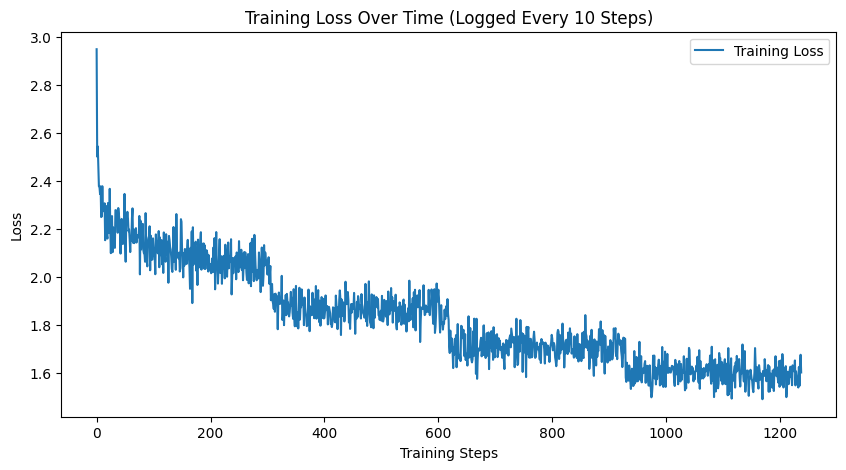

In [ ]:
# Plot training
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_losses_log.losses, label='Training Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss Over Time (Logged Every 10 Steps)')
plt.legend()
plt.show()

#### Fine-Tuned Model Assessments

MODEL 1- Trained on abstract, introduction and conclusion.

Params:

`training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    num_train_epochs=3,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True) #memory saving
)`

Results:

| Epoch | Training Loss | Validation Loss |
|-------|---------------|-----------------|
| 1     | 2.056400      | 2.008811        |
| 2     | 1.929500      | 1.971793        |
| 3     | 1.836200      | 1.962582        |


Assesing fine-tuning metrics:
- Training loss is steadily decreasing but validation loss is not decreasing too much
- Gap between training and validation losses are reasonably small which implies that the model is not experiencing problems with overfitting
- Next steps: consider increasing epochs to allow for more training time since training loss looks to still be decreasing and/or increasing learning rate to help model converge faster

Model saved at:

- '/content/drive/MyDrive/trained_bart_model'
- '/content/drive/MyDrive/trained_bart_tokenizer'

MODEL 2 - Trained on abstract, introduction and conclusion. Slight epoch increase & slight learning rate increase.

Params:

`training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model2",
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    num_train_epochs=4,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True)`

Results:

| Epoch | Training Loss | Validation Loss |
|-------|---------------|-----------------|
| 1     | 1.926900      | 2.004851        |
| 2     | 1.900100      | 1.972085        |
| 3     | 1.790000      | 1.956313        |
| 4     | 1.742100      | 1.960566        |


Assesing fine-tuning metrics:
- Losses are steadily decreasing- hence, model still learning
- Training loss is still decreasing but validation loss is not decreasing much
- Higher learning rate so it should converge faster than MODEL 1
- Gap between training and validation losses are reasonably small which implies that the model is not experiencing problem with overfitting
- Lower training loss than MODEL 1 but validation loss is about the same

Model saved at:

- '/content/drive/MyDrive/trained_bart_model2'
- '/content/drive/MyDrive/trained_bart_tokenizer2'

MODEL 3 - Trained on abstract, introduction and conclusion with 10 epochs (although training for 10 epochs is excessive, we explored this out of curiosity to observe the model's performance over a longer training period).

Params:

`training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model3",
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    num_train_epochs=10,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True)`

Results:

| Epoch | Training Loss | Validation Loss |
|-------|---------------|-----------------|
| 1     | 1.927400      | 2.010010        |
| 2     | 1.903800      | 1.980505        |
| 3     | 1.785700      | 1.972404        |
| 4     | 1.707600      | 1.999029        |
| 5     | 1.475600      | 2.004464        |
| 6     | 1.490800      | 2.032721        |
| 7     | 1.396600      | 2.063114        |
| 8     | 1.367500      | 2.088458        |
| 9     | 1.287100      | 2.108247        |
| 10    | 1.292400      | 2.130313        |


Assesing fine-tuning metrics:
- Decreasing training loss but increasing validation loss indicates overfitting, as expected

Model saved at:

- '/content/drive/MyDrive/trained_bart_model3'
- '/content/drive/MyDrive/trained_bart_tokenizer3'

MODEL 4 - Trained on full article.

Params:

`training_args = Seq2SeqTrainingArguments(
    output_dir="bart-large-cnn-model4",
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=4,
    predict_with_generate=True,
    generation_max_length=200,
    fp16=True)`

Results:

| Epoch | Training Loss | Validation Loss |
|-------|---------------|-----------------|
| 1     | 1.970500      | 2.011420        |
| 2     | 1.820600      | 1.970402        |
| 3     | 1.742100      | 1.962987        |
| 4     | 1.602000      | 1.975746        |


Assesing fine-tuning metrics:
- Training loss is still decreasing but validation loss is not decreasing much
- Gap between training and validation losses are reasonably small which implies that the model is not experiencing problem with overfitting
- Reaches lower training loss than MODELS 1, 2 & 3 but validation loss is about the same as MODEL 1 & 2

Model saved at:

- '/content/drive/MyDrive/trained_bart_model4'
- '/content/drive/MyDrive/trained_bart_tokenizer4'

### Abstractive Summarization w/ Abs w/ BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

Motivation: Trial and error since abstractive summarization with just abs showed highest results.

In [ ]:
def abstractive_summarization(article):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)
    # Use torch.no_grad() during inference
    with torch.no_grad():
        inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True).to(device)
        summary_ids = bart_model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_summary


In [ ]:
# Generate summaries for the test set using abstractive_summarization
generated_summaries = [abstractive_summarization(article) for article in test_data_abs['article']]
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in ∼36, 000 deaths annually in the United States. Current vaccines against influenza virus elicit an antibody response specific for the envelope glycoproteins. However, high mutation rates result in the emergence of new viral serotypes, which elude neutralization by preexisting antibodies. T lymphocytes have been reported to be capable of mediating heterosubtypic protection through recognition of internal, more conserved, influenza virus proteins. Here, we demonstrate using a recombinant influenza virus expressing the LCMV GP33-41 epitope that influenza virus-specific CD8+ T cells and non-neutralizing antibodies each are relatively ineffective at conferring protective immunity alone, but that when combined, they can elicit robust protective immunity. This synergistic improvement in protective immunity is dependent, at least in part, on alveolar macrophages and/or other lung phagocytes. Overall, our studies suggest that an 

In [ ]:
reference_summaries = test_data_abs['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5405746976304521, 'recall': 0.4309801787196548, 'f1': 0.47311026668507633}, 'rouge2': {'precision': 0.19050914697433674, 'recall': 0.1513243949500627, 'f1': 0.1663705532818035}, 'rougeL': {'precision': 0.29305839216111446, 'recall': 0.23366847846158487, 'f1': 0.2563823507079334}}
{'flesch_kincaid_grade': 14.476090116279071, 'gunning_fog_index': 16.479447674418605}


### Abstractive Summarization w/ Abs w/ BART Fine-Tuned on Full Article (Model 4 Run)

In [ ]:
# Load model from drive

from google.colab import drive
drive.mount('/content/drive')

drive_model_save_path_drive = '/content/drive/MyDrive/trained_bart_model4'
drive_tokenizer_save_path_drive = '/content/drive/MyDrive/trained_bart_tokenizer4'

# Load model and tokenizer
bart_model = AutoModelForSeq2SeqLM.from_pretrained(drive_model_save_path_drive)
tokenizer = AutoTokenizer.from_pretrained(drive_tokenizer_save_path_drive)

Mounted at /content/drive


In [ ]:
def abstractive_summarization(article):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    # Abstractive summarization (using model fine tuned on full data)
    with torch.no_grad():
        inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True, padding='max_length')
        inputs = inputs.to(device)
        summary_ids = bart_model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_summary

In [ ]:
generated_summaries = [abstractive_summarization(article) for article in test_data_abs['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5392570821050728, 'recall': 0.4285974039521835, 'f1': 0.4710578430415421}, 'rouge2': {'precision': 0.1890214672765132, 'recall': 0.1493619463992768, 'f1': 0.16458492421388807}, 'rougeL': {'precision': 0.2914654229323272, 'recall': 0.2317015720497072, 'f1': 0.25451124950189774}}
{'flesch_kincaid_grade': 14.459302325581396, 'gunning_fog_index': 16.47010901162791}


### Abstractive Summarization w/ Lead-8 w/ BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
def lead_k_extraction(article, K):
    sentences = article.split('. ')
    return '. '.join(sentences[:K]) + '.'

In [ ]:
# Apply the LEAD-K model to the dataset
def apply_lead_k_model(dataset, K):
    results = []
    for text in dataset:
        summary = lead_k_extraction(text, K)
        results.append(summary)
    return ' '.join(results)

In [ ]:
modelpath = '/content/drive/MyDrive/trained_bart_model2'
tokenizer_path = '/content/drive/MyDrive/trained_bart_tokenizer2'

bart_model2 = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer2 = AutoTokenizer.from_pretrained(tokenizer_path)

In [ ]:
def abstractive_summarization_leadk(article):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model2.to(device)

    # Extractive summarization
    extracted_content = lead_k_extraction(article, 8)  # Extract first 8 sentences

    # Abstractive summarization (using model 2)
    with torch.no_grad():
        inputs = tokenizer.encode(extracted_content, return_tensors='pt', max_length=1024, truncation=True, padding='max_length')
        inputs = inputs.to(device)
        generated_summary = bart_model2.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer2.decode(generated_summary[0], skip_special_tokens=True)

    return summary

In [ ]:
generated_summaries_leadk = [abstractive_summarization_leadk(article) for article in test_data['article']]

In [ ]:
reference_summaries_leadk = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries_leadk, generated_summaries_leadk)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.542006271806986, 'recall': 0.4070233380539697, 'f1': 0.45712809237208296}, 'rouge2': {'precision': 0.18910966424669828, 'recall': 0.14087065402696958, 'f1': 0.15867105981420818}, 'rougeL': {'precision': 0.2954164187665494, 'recall': 0.22120165739417108, 'f1': 0.24859398494749224}}
{'flesch_kincaid_grade': 14.440261627906976, 'gunning_fog_index': 16.54623546511628}


### Abstractive Summarization w/ Abs, Intro, Con w/ BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
def abstractive_summarization(article):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)
    # Use torch.no_grad() during inference
    with torch.no_grad():
        inputs = tokenizer.encode(article, return_tensors='pt', max_length=1024, truncation=True).to(device)
        summary_ids = bart_model.generate(inputs, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_summary

In [ ]:
generated_summaries = [abstractive_summarization(article) for article in test_data_abs_intro_con['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.520637269366072, 'recall': 0.42197232795707845, 'f1': 0.46000845279817404}, 'rouge2': {'precision': 0.1731830592071297, 'recall': 0.13975597331391662, 'f1': 0.15261200372682043}, 'rougeL': {'precision': 0.2748789258600744, 'recall': 0.22301131937398483, 'f1': 0.2429090699608696}}
{'flesch_kincaid_grade': 14.470130813953489, 'gunning_fog_index': 16.61638808139535}


### Hybrid Summarization w/ Abs w/ TFIDF & BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
def extractive_summarization(article, num_sentences=8):
    sentences = nltk.sent_tokenize(article)
    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf_matrix = vectorizer.fit_transform([article])
    similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

    ranked_i = similarity_matrix[0].argsort()[:-(num_sentences+1):-1]
    selected_sentences = [sentences[i] for i in ranked_i]
    summary = ' '.join(selected_sentences)

    return summary

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs['article']]
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in ∼36, 000 deaths annually in the United States. Seasonal influenza virus epidemics are responsible for approximately one-third of all influenza-related deaths in the world. The majority of influenza-associated deaths occur during the first half of the year when influenza virus is circulating in the population and the second half when the virus is transmitted to humans.
--------------------------------------------------------------------------------
Generated Summary:  of leprosy remains a public health problem in Brazil with new case incidence exceeding World Health Organization ( WHO ) goals in endemic clusters throughout the country. New case incidence is also exceeding WHO goals in areas of Brazil where the disease has been endemic for more than 50 years.
--------------------------------------------------------------------------------
Generated Summary: Leishmaniasis is a disease caused by infection with the protozoan

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5631855637868189, 'recall': 0.16889658653349873, 'f1': 0.25524204200830825}, 'rouge2': {'precision': 0.16326422723950923, 'recall': 0.04727813068778755, 'f1': 0.07199082132604555}, 'rougeL': {'precision': 0.3604101495174518, 'recall': 0.10670677735015129, 'f1': 0.1617206092956431}}
{'flesch_kincaid_grade': 13.527761627906974, 'gunning_fog_index': 15.133648255813954}


### Hybrid Summarization w/ Abs, Intro & Con w/ TFIDF & BART Fine-Tuned on Full Article (Model 4 Run)

In [ ]:
def extractive_summarization(article, num_sentences=20):
    sentences = nltk.sent_tokenize(article)
    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf_matrix = vectorizer.fit_transform([article])
    similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

    ranked_i = similarity_matrix[0].argsort()[:-(num_sentences+1):-1]
    selected_sentences = [sentences[i] for i in ranked_i]
    summary = ' '.join(selected_sentences)

    return summary

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
# Generate summaries for the test set using hybrid_summarization
generated_summaries = [hybrid_summarization(article) for article in test_data['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5379285841101631, 'recall': 0.19235701327353527, 'f1': 0.27679205938691115}, 'rouge2': {'precision': 0.1466991539718591, 'recall': 0.05023107688354479, 'f1': 0.0730700178763899}, 'rougeL': {'precision': 0.3309305300583594, 'recall': 0.11623369786448164, 'f1': 0.16804463973078748}}
{'flesch_kincaid_grade': 14.13706395348837, 'gunning_fog_index': 15.616918604651161}


### Hybrid Summarization  w/ Abs w/ TFIDF & Pre-Trained CNN BART

In [ ]:
tokenizer= AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model_basic= AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

In [ ]:
def extractive_summarization(article, num_sentences=8):
    sentences = nltk.sent_tokenize(article)
    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf_matrix = vectorizer.fit_transform([article])
    similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

    ranked_i = similarity_matrix[0].argsort()[:-(num_sentences+1):-1]
    selected_sentences = [sentences[i] for i in ranked_i]
    summary = ' '.join(selected_sentences)

    return summary

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs_intro_con['article']]
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in ∼36, 000 deaths annually in the United States. Seasonal epidemic virus result in  36, 000 deaths in the U.S. each year. The United States has one of the highest rates of influenza in the world.
--------------------------------------------------------------------------------
Generated Summary: Leprosy remains a public health problem in Brazil with new case incidence exceeding World Health Organization ( WHO ) goals in endemic clusters throughout the country. New case incidence is exceeding World health Organization (WHO ) goals. New cases are exceeding WHO goals in endemic clusters in Brazil.
--------------------------------------------------------------------------------
Generated Summary: Leishmaniasis is an infection resulting from infection with the protozoan parasite Leishmania. It consists of a wide spectrum of clinical manifestations, from healing cutaneous lesions to fatal visceral infections. The most common for

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5549242630880867, 'recall': 0.14290079352714785, 'f1': 0.2242907347406166}, 'rouge2': {'precision': 0.1658130113559013, 'recall': 0.041081123086841295, 'f1': 0.06497766470683942}, 'rougeL': {'precision': 0.3708766640915954, 'recall': 0.09498207932652748, 'f1': 0.14922887802557805}}
{'flesch_kincaid_grade': 10.725, 'gunning_fog_index': 12.248241279069768}


Comments on results:
- Readability score, noticably lower -> easier to understand (even lower than the reference readability scores)
- ROUGE performance is worse than abstractive summarisation with default BART

### Hybrid Summarization w/ Abs, Intro & Con w/ TFIDF & BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
def extractive_summarization(article, num_sentences=20):
    sentences = nltk.sent_tokenize(article)
    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf_matrix = vectorizer.fit_transform([article])
    similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

    ranked_i = similarity_matrix[0].argsort()[:-(num_sentences+1):-1]
    selected_sentences = [sentences[i] for i in ranked_i]
    summary = ' '.join(selected_sentences)

    return summary

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary

In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs_intro_con['article']]
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in ∼36, 000 deaths annually in the United States. Seasonal influenza virus epidemics are responsible for approximately one-third of all influenza-related deaths in the world. The majority of influenza-associated deaths occur during the first half of the year when influenza virus is circulating in the population and the second half when the virus is transmitted to humans.
--------------------------------------------------------------------------------
Generated Summary:  disease remains a public health problem in Brazil with new case incidence exceeding World Health Organization ( WHO ) goals in endemic clusters throughout the country. New cases of leprosy have been reported in Rio de Janeiro, São Paulo, Minas Gerais and Paraíba regions of Brazil.
--------------------------------------------------------------------------------
Generated Summary: Leishmaniasis is a disease caused by infection with the protozoan parasite Leis

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5624392451603204, 'recall': 0.16836769852241507, 'f1': 0.25457486819698255}, 'rouge2': {'precision': 0.16240182571482675, 'recall': 0.04702994565757915, 'f1': 0.07160681126244577}, 'rougeL': {'precision': 0.3602590217645327, 'recall': 0.10655258243220093, 'f1': 0.16153696954951358}}
{'flesch_kincaid_grade': 13.497819767441861, 'gunning_fog_index': 15.123437500000001}


### Hybrid Summarization w/ Abs, Intro & Con w/ TFIDF & BART Fine-Tuned on Full Article (Model 4 Run)

In [ ]:
def extractive_summarization(article, num_sentences=20):
    sentences = nltk.sent_tokenize(article)
    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf_matrix = vectorizer.fit_transform([article])
    similarity_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

    ranked_i = similarity_matrix[0].argsort()[:-(num_sentences+1):-1]
    selected_sentences = [sentences[i] for i in ranked_i]
    summary = ' '.join(selected_sentences)

    return summary

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs_intro_con['article']]

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5379285841101631, 'recall': 0.19235701327353527, 'f1': 0.27679205938691115}, 'rouge2': {'precision': 0.1466991539718591, 'recall': 0.05023107688354479, 'f1': 0.0730700178763899}, 'rougeL': {'precision': 0.3309305300583594, 'recall': 0.11623369786448164, 'f1': 0.16804463973078748}}
{'flesch_kincaid_grade': 14.13706395348837, 'gunning_fog_index': 15.616918604651161}


### Hybrid Summarization w/ Abs w/ Bio Bert & BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
biobert_tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
biobert_model = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def extractive_summarization(article, num_sentences=5):
    sentences = nltk.sent_tokenize(article)
    inputs = biobert_tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = biobert_model(**inputs)
    scores = outputs.logits[:, 1]
    ranked_sentences = [sentences[i] for i in scores.argsort(descending=True)]
    return ' '.join(ranked_sentences[:num_sentences])

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5560288672263188, 'recall': 0.3921887263266949, 'f1': 0.45098796487810233}, 'rouge2': {'precision': 0.19399166590229208, 'recall': 0.1357917760478709, 'f1': 0.15660554965006931}, 'rougeL': {'precision': 0.29906598749454455, 'recall': 0.20956390138732173, 'f1': 0.2414089832569736}}
{'flesch_kincaid_grade': 14.839680232558141, 'gunning_fog_index': 16.923219476744183}


### Hybrid Summarization w/ Abs w/ Bio Bert & BART Fine-Tuned on Full Article (Model 4 Run)

In [ ]:
biobert_tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
biobert_model = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def extractive_summarization(article, num_sentences=5):
    sentences = nltk.sent_tokenize(article)
    inputs = biobert_tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = biobert_model(**inputs)
    scores = outputs.logits[:, 1]
    ranked_sentences = [sentences[i] for i in scores.argsort(descending=True)]
    return ' '.join(ranked_sentences[:num_sentences])

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary

In [ ]:
# Generate summaries for the test set using hybrid_summarization
generated_summaries = [hybrid_summarization(article) for article in test_data_abs['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in ∼36, 000 deaths annually in the United States. Current vaccines against influenza virus elicit an antibody response specific for the envelope glycoproteins of the virus. However, high mutation rates result in the emergence of new viral serotypes, which elude neutralization by preexisting antibodies. T lymphocytes have been reported to be capable of mediating heterosubtypic protection through recognition of internal, more conserved, influenza virus proteins. Here, we demonstrate using a recombinant influenza virus expressing the LCMV GP33-41 epitope that influenza virus-specific CD8+ T cells and non-neutralizing antibodies each are relatively ineffective at conferring protective immunity alone, but when combined virus specific CD8 T cells, non-specific antibodies, and virus specific antibodies cooperatively elicit robust protective immunity. This synergistic improvement in protective immunity is dependent, at least in pa

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.5463928608112102, 'recall': 0.39686896409572436, 'f1': 0.4517625841309663}, 'rouge2': {'precision': 0.18981862000185906, 'recall': 0.1371954432845289, 'f1': 0.15652704094406353}, 'rougeL': {'precision': 0.29434227575667293, 'recall': 0.21256468804898196, 'f1': 0.2424205085738773}}
{'flesch_kincaid_grade': 14.599418604651163, 'gunning_fog_index': 16.633190406976745}


### Hybrid Summarization w/ Abs, Intro & Con w/ Bio Bert & BART Fine-Tuned on Abs, Intro & Con (Model 2 Run)

In [ ]:
biobert_tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
biobert_model = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def extractive_summarization(article, num_sentences=8):
    sentences = nltk.sent_tokenize(article)
    inputs = biobert_tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = biobert_model(**inputs)
    scores = outputs.logits[:, 1]
    ranked_sentences = [sentences[i] for i in scores.argsort(descending=True)]
    return ' '.join(ranked_sentences[:num_sentences])

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data_abs_intro_con['article']]
reference_summaries = test_data['summary']

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: CD8+ T cell based vaccines are a promising approach to the generation of a safe and effective influenza virus-based vaccine. However, there is some conflicting data over whether CD8+ protection wanes over time, and if true this gradual loss of the virus-specific population represents a serious concern. Furthermore, memory T cells are detected in the peripheral blood of healthy adolescents and adults, and there is evidence for heterosubtypic immunity in humans that has been proposed to be due to T cells. Several groups have also noted the potential role of CD4+ T cells in providing protection against influenza virus. All in vivo mouse antibodies were purchased from Bio X Cell ( West Lebanon, NH ). Staining and analysis were performed as previously described.
--------------------------------------------------------------------------------
Generated Summary: Brazil has globally the second highest new case incidence of leprosy, with 54/10, 000 new cases in 2010. This num

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.3865870460952511, 'recall': 0.25631747213157796, 'f1': 0.30154111195250316}, 'rouge2': {'precision': 0.0718250395149877, 'recall': 0.047189250052078885, 'f1': 0.05570895472059664}, 'rougeL': {'precision': 0.19841256031371104, 'recall': 0.1297015715385925, 'f1': 0.15324670658992576}}
{'flesch_kincaid_grade': 12.877252906976743, 'gunning_fog_index': 15.284912790697675}


### Hybrid Summarization w/ Abs, Intro & Con w/ Bio Bert & BART Fine-Tuned on Full Article (Model 4 Run)

In [ ]:
biobert_tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
biobert_model = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def extractive_summarization(article, num_sentences=8):
    sentences = nltk.sent_tokenize(article)
    inputs = biobert_tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = biobert_model(**inputs)
    scores = outputs.logits[:, 1]
    ranked_sentences = [sentences[i] for i in scores.argsort(descending=True)]
    return ' '.join(ranked_sentences[:num_sentences])

def abstractive_summarization(input):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bart_model.to(device)

    with torch.no_grad():
        tokenized_input = tokenizer.encode(input, return_tensors='pt', max_length=1024, truncation=True).to(device)
        generated_summary = bart_model.generate(tokenized_input, max_length=200, length_penalty=2, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

    return summary

def hybrid_summarization(article):
    extracted_summary = extractive_summarization(article)
    final_summary = abstractive_summarization(extracted_summary)

    return final_summary


In [ ]:
generated_summaries = [hybrid_summarization(article) for article in test_data['article']]

In [ ]:
reference_summaries = test_data['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.4089115655049195, 'recall': 0.24417731607984006, 'f1': 0.29560308732442686}, 'rouge2': {'precision': 0.07874747972759231, 'recall': 0.046603262351683085, 'f1': 0.05663332233103531}, 'rougeL': {'precision': 0.2176773265986536, 'recall': 0.12679806897797913, 'f1': 0.1546232978869479}}
{'flesch_kincaid_grade': 12.303633720930232, 'gunning_fog_index': 14.618895348837208}


## Experiments - Pegasus

### Pegasus (CNN/DailyMail) w/ Abs, Intro & Con

In [ ]:
# Initialize Pegasus model and tokenizer for CNN/DailyMail
model_name = 'google/pegasus-cnn_dailymail'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
test_pegasus = test_data_abs_intro_con['article']

In [ ]:
summarize_pipe = pipeline("summarization", model=model, tokenizer=tokenizer, device=0 if device == 'cuda' else -1)

In [ ]:
pipe_out = summarize_pipe(test_pegasus, max_length=200, truncation=True)

In [ ]:
generated_summaries = [output['summary_text'] for output in pipe_out]

In [ ]:
for i, summary in enumerate(generated_summaries[:5]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: Seasonal epidemics of influenza virus result in 36 , 000 deaths annually in the United States .<n>Current vaccines against influenza virus elicit an antibody response specific for the envelope glycoproteins .<n>High mutation rates result in the emergence of new viral serotypes, which elude neutralization by preexisting antibodies .
--------------------------------------------------------------------------------
Generated Summary: Leprosy remains a public health problem in Brazil with new case incidence exceeding WHO goals in endemic clusters throughout the country .<n>Migration can facilitate movement of disease between endemic and non-endemic areas .<n>Alcohol consumption was also associated with leprosy .
--------------------------------------------------------------------------------
Generated Summary: We investigated what cytokines contribute to increased pathology when IL-10-mediated regulation is absent .<n>Both IFN- and IL-17 levels were substantially elevated

In [ ]:
reference_summaries = test_data_abs_intro_con['summary']

In [ ]:
for i, summary in enumerate(reference_summaries[:5]):
    print(f"Reference Summary: {summary}")
    print("-"*80)

Reference Summary: Influenza virus continues to pose a significant risk to global health and is responsible for thousands of deaths each year in the United States . This threat is largely due to the ability of the influenza virus to undergo rapid changes , allowing it to escape from immune responses elicited by previous infections or vaccinations . Certain internal determinants of the influenza virus are largely conserved across different viral strains and represent attractive targets for potential “universal” influenza vaccines . Here , we demonstrated that cross-subtype protection against the influenza virus could be obtained through simultaneous priming of multiple arms of the immune response against conserved elements of the influenza virus . These results suggest a novel strategy that could potentially form a primary component of a universal influenza vaccine capable of providing long-lasting protection .
----------------------------------------------------------------------------

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries, generated_summaries)

In [ ]:
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.6187558509211103, 'recall': 0.16820417363425194, 'f1': 0.25868778152793565}, 'rouge2': {'precision': 0.23120701793963774, 'recall': 0.06113934596654327, 'f1': 0.09458982017849499}, 'rougeL': {'precision': 0.41004978553024785, 'recall': 0.10981510866126394, 'f1': 0.16944834066837747}}
{'flesch_kincaid_grade': 12.728125, 'gunning_fog_index': 15.292630813953489}


### Pegasus (PubMed) w/ Abs, Intro & Con

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer_pubmed = AutoTokenizer.from_pretrained('google/pegasus-pubmed')
model_pubmed = PegasusForConditionalGeneration.from_pretrained('google/pegasus-pubmed').to(device)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-pubmed and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
summarize_pipe_pubmed = pipeline("summarization", model=model_pubmed, tokenizer=tokenizer_pubmed, device=0 if device == 'cuda' else -1)

In [ ]:
pipe_out = summarize_pipe_pubmed(test_pegasus, max_length=200, truncation=True)

In [ ]:
generated_summaries_pubmed = [output['summary_text'] for output in pipe_out]

In [ ]:
for i, summary in enumerate(generated_summaries_pubmed[:10]):
    print(f"Generated Summary: {summary}")
    print("-"*80)

Generated Summary: abstractinfluenza virus causes significant morbidity and mortality in the united states each year . <n> current vaccines elicit specific antibodies against influenza virus serotypes . <n> however , they do not provide adequate protection against multiple strains of the virus . <n> vaccines elicit antibodies against only a small fraction of the viral strains . <n> the majority of these antibodies are nonspecific and do not provide adequate protection against multiple strains of the virus . <n> thus , vaccines elicit antibodies against only a small fraction of the viral strains . <n> the majority of these antibodies are nonspecific and do not provide adequate protection against multiple strains of the virus . <n> vaccines elicit antibodies against only a small fraction of the viral strains . <n> the majority of these antibodies are nonspecific and do not provide adequate protection against multiple strains of the virus . <n> the majority of these antibodies are nonspec

In [ ]:
reference_summaries_pubmed = test_data_abs_intro_con['summary']

In [ ]:
rouge_scores, readability_metrics = evaluate_summaries(reference_summaries_pubmed, generated_summaries_pubmed)

In [ ]:
print(rouge_scores)
print(readability_metrics)

{'rouge1': {'precision': 0.3843653566856268, 'recall': 0.23010030506413415, 'f1': 0.2783010732522601}, 'rouge2': {'precision': 0.0801605663723963, 'recall': 0.046682109298249994, 'f1': 0.056920429132219355}, 'rougeL': {'precision': 0.22916075569755634, 'recall': 0.13581359518279393, 'f1': 0.16442914878354084}}
{'flesch_kincaid_grade': 14.176889534883722, 'gunning_fog_index': 13.778452034883722}
